# StatsBomb Football Analytics

 In this data, I look to contextualize the enormity of Arsenal's accomplishments over the weekend. How many teams have faced this peppering from City since Guardiola joined?

In [99]:
# load the libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

In [100]:
# load the competition files from StatsBomb open data folder at GitHub

stats_bomb_base_url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data'
stats_bomb_competition_url = f"{stats_bomb_base_url}/competitions.json"
competitions = requests.get(stats_bomb_competition_url)

response = requests.get(stats_bomb_competition_url)
if response.status_code == 200:
    competitions = response.json()  # Try to parse JSON
else:
    print(f"Error: Received status code {response.status_code}")


In [101]:
competitions

[{'competition_id': 9,
  'season_id': 281,
  'country_name': 'Germany',
  'competition_name': '1. Bundesliga',
  'competition_gender': 'male',
  'competition_youth': False,
  'competition_international': False,
  'season_name': '2023/2024',
  'match_updated': '2024-07-15T14:15:54.671676',
  'match_updated_360': '2024-07-15T14:17:00.877356',
  'match_available_360': '2024-07-15T14:17:00.877356',
  'match_available': '2024-07-15T14:15:54.671676'},
 {'competition_id': 9,
  'season_id': 27,
  'country_name': 'Germany',
  'competition_name': '1. Bundesliga',
  'competition_gender': 'male',
  'competition_youth': False,
  'competition_international': False,
  'season_name': '2015/2016',
  'match_updated': '2024-05-19T11:11:14.192381',
  'match_updated_360': None,
  'match_available_360': None,
  'match_available': '2024-05-19T11:11:14.192381'},
 {'competition_id': 1267,
  'season_id': 107,
  'country_name': 'Africa',
  'competition_name': 'African Cup of Nations',
  'competition_gender': 'ma

In [102]:
# give me all of the 2024 UEFA Euro

# "competition_id" : 55,
# "season_id" : 282,
competition_id = 55
season_id = 282

matches_url = f"{stats_bomb_base_url}/matches/{str(competition_id)}/{str(season_id)}.json"
response = requests.get(matches_url)
if response.status_code == 200:
    matches = response.json()  # Try to parse JSON
else:
    print(f"Error: Received status code {response.status_code}")

In [103]:
# print all the competitions with competition_id and season_id
matches_df = json_normalize(matches)
pd.set_option("display.max.columns", None)

### Get all the Spain matches

In [104]:
# Get all the Spain matches
filtered_matches_df = matches_df[
    (matches_df['home_team.country.name'].fillna('') == 'Spain') | 
    (matches_df['away_team.country.name'].fillna('') == 'Spain')
]

# Display the first few rows of the filtered DataFrame
filtered_matches_df.shape[0]
filtered_matches_df.head()

match_id  match_date      kick_off  home_score  away_score match_status  \
1    3943043  2024-07-14  22:00:00.000           2           1    available   
2    3942752  2024-07-09  22:00:00.000           2           1    available   
8    3942226  2024-07-05  19:00:00.000           2           1    available   
15   3941018  2024-06-30  22:00:00.000           4           1    available   
18   3930179  2024-06-24  22:00:00.000           0           1    available   

   match_status_360                last_updated            last_updated_360  \
1         available  2024-07-15T15:48:50.315500  2024-07-15T15:52:24.778809   
2         available  2024-07-10T08:51:07.032303  2024-07-10T13:01:26.597509   
8         available  2024-07-13T03:52:05.176875  2024-07-13T03:52:43.383929   
15        available  2024-07-12T06:06:58.963038  2024-07-12T06:08:12.572176   
18        available  2024-07-01T06:01:14.238710  2024-07-01T06:07:22.418137   

    match_week  competition.competition_id competition.country_name  \
1            7                          55                   Europe   
2            6                          55                   Europe   
8            5                          55                   Europe   
15           4                          55                   Europe   
18           3                          55                   Europe   

   competition.competition_name  season.season_id season.season_name  \
1                     UEFA Euro               282               2024   
2                     UEFA Euro               282               2024   
8                     UEFA Euro               282               2024   
15                    UEFA Euro               282               2024   
18                    UEFA Euro               282               2024   

    home_team.home_team_id home_team.home_team_name  \
1                      772                    Spain   
2                      772                    Spain   
8                      772                    Spain   
15                     772                    Spain   
18                     906                  Albania   

   home_team.home_team_gender home_team.home_team_group  home_team.country.id  \
1                        male                      None                   214   
2                        male                      None                   214   
8                        male                      None                   214   
15                       male                      None                   214   
18                       male                      None                     3   

   home_team.country.name                                 home_team.managers  \
1                   Spain  [{'id': 5588, 'name': 'Luis de la Fuente Casti...   
2                   Spain  [{'id': 5588, 'name': 'Luis de la Fuente Casti...   
8                   Spain  [{'id': 5588, 'name': 'Luis de la Fuente Casti...   
15                  Spain  [{'id': 5588, 'name': 'Luis de la Fuente Casti...   
18                Albania  [{'id': 1877, 'name': 'Sylvio Mendes Campos Ju...   

    away_team.away_team_id away_team.away_team_name  \
1                      768                  England   
2                      771                   France   
8                      770                  Germany   
15                    2138                  Georgia   
18                     772                    Spain   

   away_team.away_team_gender away_team.away_team_group  away_team.country.id  \
1                        male                      None                    68   
2                        male                      None                    78   
8                        male                      None                    85   
15                       male                      None                    84   
18                       male                      None                   214   

   away_team.country.name                                 away_team.managers 

## Get the passes from the Spain Match

In [105]:
### Try and get the passes from a game --> try match_id = 3943043
stats_bomb_events_url = f"{stats_bomb_base_url}/events"
spain_match_event = f"{stats_bomb_events_url}/3943043.json"

response = requests.get(spain_match_event)
events = response.json()
events_df = json_normalize(events)

# Correct filtering for rows where 'type.name' is 'Pass'
spain_passes = events_df[(events_df['type.name'] == 'Pass')
                         & (events_df['possession_team.name'] == 'Spain')]

spain_passes.tail()

id  index  period     timestamp  \
3260  6afea8ce-1780-4598-8e09-5d1be972121a   3261       2  00:44:57.594   
3266  dbcdbfe0-01be-4966-8fe5-b3a8231031a2   3267       2  00:45:25.157   
3269  56474ff3-31d2-40e7-adc8-7d96ed2109e9   3270       2  00:45:28.285   
3277  d993c1f2-93a4-4ebc-a2e3-f1d2974ff165   3278       2  00:46:55.502   
3306  c97bde53-d083-4ffc-a545-8636450650e4   3307       2  00:48:45.183   

      minute  second  possession  duration  type.id type.name  \
3260      89      57         139  3.936642       30      Pass   
3266      90      25         141  3.127684       30      Pass   
3269      90      28         141  3.238026       30      Pass   
3277      91      55         143  3.646638       30      Pass   
3306      93      45         147  4.180345       30      Pass   

      possession_team.id possession_team.name  play_pattern.id  \
3260                 772                Spain                7   
3266                 772                Spain                4   
3269                 772                Spain                4   
3277                 772                Spain                3   
3306                 772                Spain                3   

     play_pattern.name  team.id team.name  tactics.formation tactics.lineup  \
3260    From Goal Kick      772     Spain                NaN            NaN   
3266     From Throw In      772     Spain                NaN            NaN   
3269     From Throw In      772     Spain                NaN            NaN   
3277    From Free Kick      772     Spain                NaN            NaN   
3306    From Free Kick      772     Spain                NaN            NaN   

                                         related_events      location  \
3260                                                NaN   [5.4, 43.8]   
3266             [696df61f-dcfd-4c10-9448-3a3a7c221ce3]  [38.6, 80.0]   
3269             [4ec4c58f-3ede-4fb8-8136-e3d470c1324b]  [82.5, 75.3]   
3277  [2212f35c-a26b-409c-b4bf-abd5089e2b11, c6f0a7f...  [26.1, 21.1]   
3306             [07fdd91f-e5eb-499f-9483-261a69dc8acc]   [22.9, 5.5]   

      player.id             player.name  position.id   position.name  \
3260    11748.0     Unai Simón Mendibil          1.0      Goalkeeper   
3266     5721.0   Daniel Carvajal Ramos          2.0      Right Back   
3269     6685.0  Mikel Oyarzabal Ugarte         23.0  Center Forward   
3277    11748.0     Unai Simón Mendibil          1.0      Goalkeeper   
3306    11748.0     Unai Simón Mendibil          1.0      Goalkeeper   

      pass.recipient.id     pass.recipient.name  pass.length  pass.angle  \
3260                NaN                     NaN    74.549380    0.497848   
3266             6685.0  Mikel Oyarzabal Ugarte    41.539497   -0.127938   
3269             3042.0      Mikel Merino Zazón    38.407550   -0.217822   
3277             3042.0      Mikel Merino Zazón    56.069687    0.195647   
3306             3042.0      Mikel Merino Zazón    77.301030    0.233683   

      pass.height.id pass.height.name pass.end_location  pass.body_part.id  \
3260             3.0        High Pass      [70.9, 79.4]               40.0   
3266             3.0        High Pass      [79.8, 74.7]                NaN   
3269             2.0         Low Pass     [120.0, 67.0]               40.0   
3277             3.0        High Pass      [81.1, 32.0]               40.0   
3306             3.0        High Pass      [98.1, 23.4]               40.0   

     pass.body_part.name  pass.type.id pass.type.name carry.end_location  \
3260          Right Foot          63.0      Goal Kick                NaN   
3266                 NaN          67.0       Throw-in                NaN   
3269          Right Foot           NaN            NaN                NaN   
3277          Right Foot          62.0      Free Kick                NaN   
3306          Right Foot          62.0      Free Kick                NaN   

      pass.outcome.id pass.outcome.name  ball_receipt.outcome.id  \
326

### Draw a Pitch

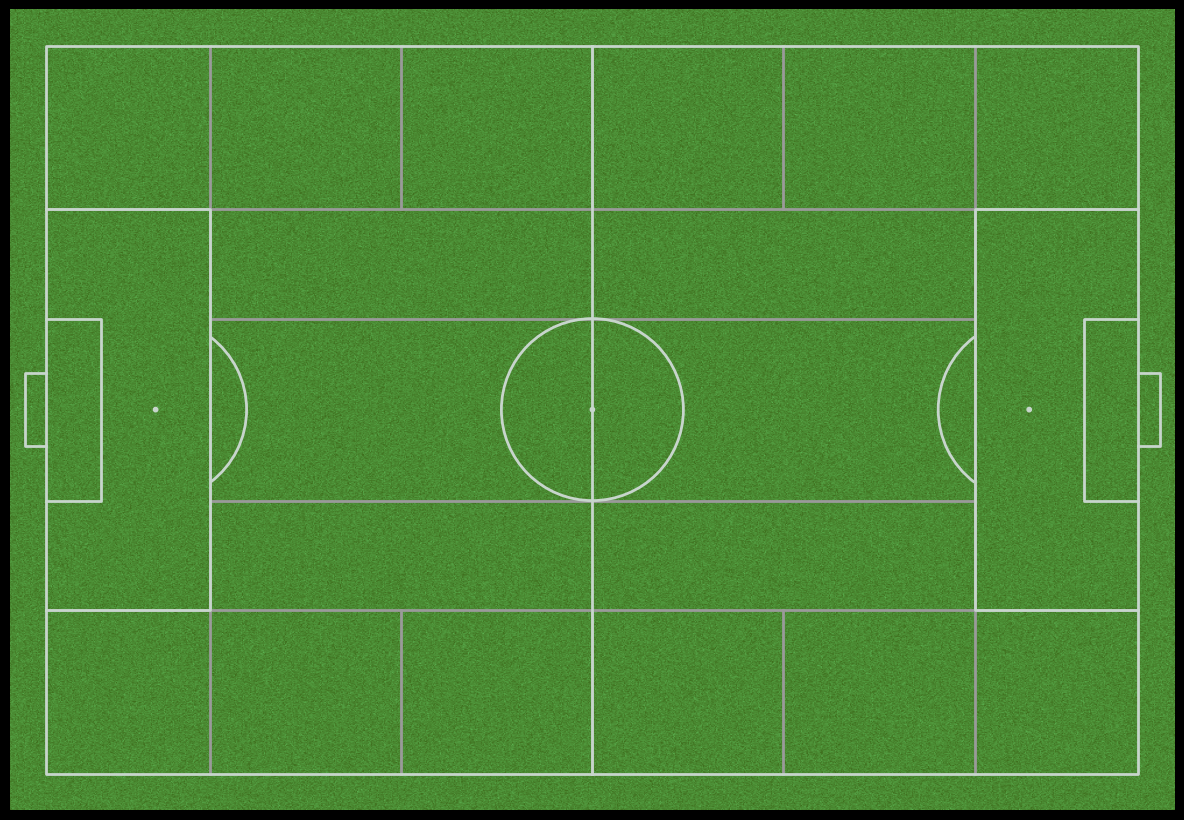

In [106]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
             pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

## Create a Pass Map

In [107]:
spain_passes.head()

id  index  period     timestamp  minute  \
9   238f44cb-0f18-4217-85b5-8cc6345278fe     10       1  00:00:34.440       0   
12  660f4d9e-9ae4-4a8c-9f44-acdbc0a04e8c     13       1  00:00:36.279       0   
16  dd8cccdf-05dc-41ca-b617-8812c416d5d2     17       1  00:00:39.436       0   
21  bd7a4187-f3ad-4f5b-a85c-e36ddeff8058     22       1  00:00:41.878       0   
24  8a1f21c9-16d7-45eb-ad1e-dd92a631517d     25       1  00:00:56.844       0   

    second  possession  duration  type.id type.name  possession_team.id  \
9       34           3  1.217978       30      Pass                 772   
12      36           3  1.390837       30      Pass                 772   
16      39           3  1.076726       30      Pass                 772   
21      41           3  0.264950       30      Pass                 772   
24      56           4  0.984324       30      Pass                 772   

   possession_team.name  play_pattern.id play_pattern.name  team.id team.name  \
9                 Spain                7    From Goal Kick      772     Spain   
12                Spain                7    From Goal Kick      772     Spain   
16                Spain                7    From Goal Kick      772     Spain   
21                Spain                7    From Goal Kick      772     Spain   
24                Spain                4     From Throw In      772     Spain   

    tactics.formation tactics.lineup  \
9                 NaN            NaN   
12                NaN            NaN   
16                NaN            NaN   
21                NaN            NaN   
24                NaN            NaN   

                                       related_events      location  \
9              [00b729e2-1d98-4bc2-b763-3a8f4f7f1daf]   [6.9, 39.6]   
12             [55276290-a4be-4d29-972d-a996549a9641]   [8.9, 57.2]   
16             [f43a51ca-9b72-4882-806f-49feb5e87036]  [28.6, 76.4]   
21  [9a75fbce-e7ef-43ba-b1c9-94c2760d48f6, d1c8792...  [61.9, 67.1]   
24             [461a0408-bda7-4372-b7dc-3d31c51c6d38]  [72.5, 80.0]   

    player.id                   player.name  position.id      position.name  \
9     11748.0           Unai Simón Mendibil          1.0         Goalkeeper   
12    22128.0  Robin Aime Robert Le Normand          3.0  Right Center Back   
16     5721.0         Daniel Carvajal Ramos          2.0         Right Back   
21     3477.0    Álvaro Borja Morata Martín         23.0     Center Forward   
24     5721.0         Daniel Carvajal Ramos          2.0         Right Back   

    pass.recipient.id           pass.recipient.name  pass.length  pass.angle  \
9             22128.0  Robin Aime Robert Le Normand    17.736967    1.446441   
12             5721.0         Daniel Carvajal Ramos    21.973848    1.009303   
16            16532.0          Daniel Olmo Carvajal    22.999348   -0.350628   
21           316046.0   Lamine Yamal Nasraoui Ebana     3.206244   -0.062419   
24            16532.0          Daniel Olmo Carvajal     7.021396   -1.874531   

    pass.height.id pass.height.name pass.end_location  pass.body_part.id  \
9              1.0      Ground Pass       [9.1, 57.2]               38.0   
12             1.0      Ground Pass      [20.6, 75.8]               40.0   
16             1.0      Ground Pass      [50.2, 68.5]               40.0   
21             1.0      Ground Pass      [65.1, 66.9]               40.0   
24             3.0        High Pass      [70.4, 73.3]                NaN   

   pass.body_part.name  pass.type.id pass.type.name carry.end_location  \
9            Left Foot          63.0      Goal Kick                NaN   
12          Right Foot           NaN            NaN                NaN   
16          Right Foot           NaN            NaN                NaN   
21          Right Foot          66.0       Recovery                NaN   
24                 NaN          67.0       Throw-in                NaN   

    pass.outcome.id pass.outcome.name  ball_receipt.outcome.id  \
9               NaN  

In [108]:
# Get all unique values in the 'pass.outcome.name' column
unique_outcomes = events_df['pass.outcome.name'].unique()

# Print or inspect the unique outcomes
print(unique_outcomes)

incomplete_pass_outcomes = ['Out', 'Incomplete', 'Unknown', 'Pass Offside']

[nan 'Out' 'Incomplete' 'Unknown' 'Pass Offside']


Text(0.5, 1.0, 'Spain Passes')

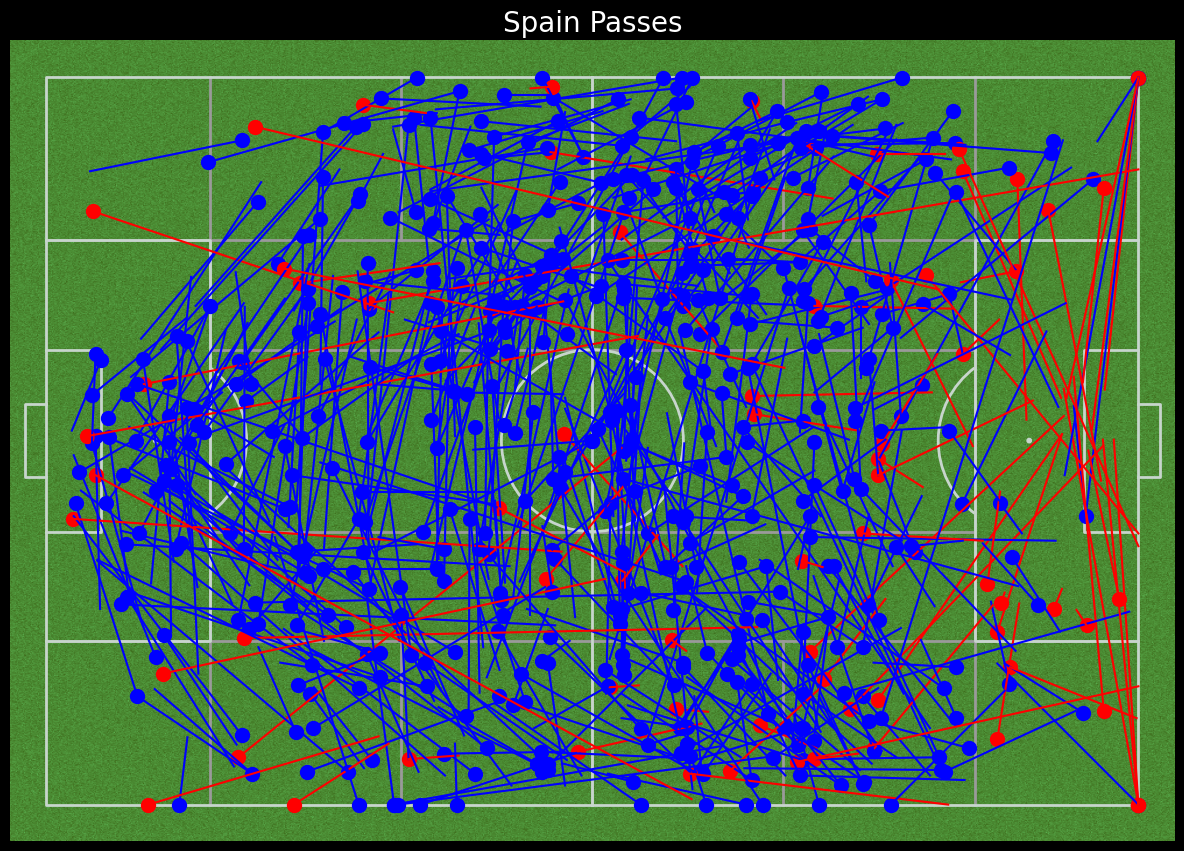

In [109]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
             pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(spain_passes['id'])):
    # we can choose period 1, 2 or both
    if spain_passes['period'].iloc[x] == 1 or spain_passes['period'].iloc[x] == 2:
        if spain_passes['pass.outcome.name'].iloc[x] in incomplete_pass_outcomes:
            """
            Here we denote where passes are incomplete
            """
            plt.plot((spain_passes['location'].iloc[x][0], spain_passes['pass.end_location'].iloc[x][0]),
                    (spain_passes['location'].iloc[x][1], spain_passes['pass.end_location'].iloc[x][1]), color='red')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='red',s = 100)
        else:
            plt.plot((spain_passes['location'].iloc[x][0], spain_passes['pass.end_location'].iloc[x][0]),
                    (spain_passes['location'].iloc[x][1], spain_passes['pass.end_location'].iloc[x][1]), color='blue')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='blue',s = 100)
plt.title('Spain Passes', color='white', size=20)

In [110]:
# Define the list of incomplete pass outcomes
incomplete_pass_outcomes = ['Out', 'Incomplete', 'Unknown', 'Pass Offside']

# Total number of passes
total_passes = len(spain_passes)

# Number of incomplete passes
incomplete_passes = sum(spain_passes['pass.outcome.name'].fillna('').apply(lambda x: x in incomplete_pass_outcomes))

# Number of completed passes (those not in incomplete_pass_outcomes)
completed_passes = total_passes - incomplete_passes

# Calculate the ratio of completed passes
completion_ratio = completed_passes / total_passes if total_passes > 0 else 0

# Print the result
print(f"Completed Pass Ratio: {completion_ratio:.2%}")

Completed Pass Ratio: 87.84%


## Anatomy of a Goal

Let's break down the passes that lead to a goal. Let's follow all of the events leading to a particular goal, and see if we can extract any insights into how it was scored.

In [152]:
### Try and get the goals from a game --> try match_id = 3943043 --> Spain v. England Final 2024-07-14
stats_bomb_events_url = f"{stats_bomb_base_url}/events"
spain_final_match_event = f"{stats_bomb_events_url}/3943043.json"

response = requests.get(spain_final_match_event)
events_spain_final = response.json()
events_spain_final_df = json_normalize(events_spain_final)

unique_outcome_values = events_spain_final_df['shot.outcome.name'].unique()

# Grab all of the goals from the game
spain_goals = events_spain_final_df[(events_spain_final_df['shot.outcome.name'] == 'Goal')
                         & (events_spain_final_df['possession_team.name'] == 'Spain')]

spain_goals.tail()

id  index  period     timestamp  \
1775  64e7e679-4246-4172-b59e-56905a09ffbf   1776       2  00:01:09.977   
3219  35c0a2a4-8e87-41cf-a26f-f85859261d87   3220       2  00:40:56.903   

      minute  second  possession  duration  type.id type.name  \
1775      46       9          81  0.544491       16      Shot   
3219      85      56         136  0.393910       16      Shot   

      possession_team.id possession_team.name  play_pattern.id  \
1775                 772                Spain                4   
3219                 772                Spain                4   

     play_pattern.name  team.id team.name  tactics.formation tactics.lineup  \
1775     From Throw In      772     Spain                NaN            NaN   
3219     From Throw In      772     Spain                NaN            NaN   

                              related_events       location  player.id  \
1775  [1202b4f3-7851-4cfd-b38c-4996d924de85]  [109.9, 28.0]    68574.0   
3219  [4c11c64a-d91d-4b6a-897b-964797acbebe]  [111.2, 36.3]     6685.0   

                    player.name  position.id   position.name  \
1775  Nicholas Williams Arthuer         21.0       Left Wing   
3219     Mikel Oyarzabal Ugarte         23.0  Center Forward   

      pass.recipient.id pass.recipient.name  pass.length  pass.angle  \
1775                NaN                 NaN          NaN         NaN   
3219                NaN                 NaN          NaN         NaN   

      pass.height.id pass.height.name pass.end_location  pass.body_part.id  \
1775             NaN              NaN               NaN                NaN   
3219             NaN              NaN               NaN                NaN   

     pass.body_part.name  pass.type.id pass.type.name carry.end_location  \
1775                 NaN           NaN            NaN                NaN   
3219                 NaN           NaN            NaN                NaN   

      pass.outcome.id pass.outcome.name  ball_receipt.outcome.id  \
1775              NaN               NaN                      NaN   
3219              NaN               NaN                      NaN   

     ball_receipt.outcome.name under_pressure  out  duel.type.id  \
1775                       NaN            NaN  NaN           NaN   
3219                       NaN            NaN  NaN           NaN   

     duel.type.name  duel.outcome.id duel.outcome.name counterpress  \
1775            NaN              NaN               NaN          NaN   
3219            NaN              NaN               NaN          NaN   

     pass.switch dribble.nutmeg  dribble.outcome.id dribble.outcome.name  \
1775         NaN            NaN                 NaN                  NaN   
3219         NaN            NaN                 NaN                  NaN   

     clearance.aerial_won clearance.head  clearance.body_part.id  \
1775                  NaN            NaN                     NaN   
3219                  NaN            NaN                     NaN   

     clearance.body_part.name  interception.outcome.id  \
1775                      NaN                      NaN   
3219                      NaN                      NaN   

     interception.outcome.name pass.cross clearance.right_foot  \
1775                       NaN        NaN                  NaN   
3219                       NaN        NaN                  NaN   

     pass.inswinging  pass.technique.id pass.technique.name  \
1775             NaN                NaN                 NaN   
3219             NaN                NaN                 NaN   

     clearance.left_foot pass.aerial_won pass.no_touch foul_won.defensive  \
1775                 NaN             NaN           NaN                NaN   
3219                 NaN             NaN           NaN                NaN   

     off_camera pass.assisted_shot_id pass.shot_assist shot.one_on_one  \
1775        NaN                   NaN              NaN             NaN   
3219        NaN                   NaN              NaN             NaN   

      s

In [153]:
len(events_spain_final_df)

3312

In [155]:
spain_nico_goal_event = events_spain_final_df[events_spain_final_df['index'] == 1776]
spain_nico_goal_event.head()

id  index  period     timestamp  \
1775  64e7e679-4246-4172-b59e-56905a09ffbf   1776       2  00:01:09.977   

      minute  second  possession  duration  type.id type.name  \
1775      46       9          81  0.544491       16      Shot   

      possession_team.id possession_team.name  play_pattern.id  \
1775                 772                Spain                4   

     play_pattern.name  team.id team.name  tactics.formation tactics.lineup  \
1775     From Throw In      772     Spain                NaN            NaN   

                              related_events       location  player.id  \
1775  [1202b4f3-7851-4cfd-b38c-4996d924de85]  [109.9, 28.0]    68574.0   

                    player.name  position.id position.name  pass.recipient.id  \
1775  Nicholas Williams Arthuer         21.0     Left Wing                NaN   

     pass.recipient.name  pass.length  pass.angle  pass.height.id  \
1775                 NaN          NaN         NaN             NaN   

     pass.height.name pass.end_location  pass.body_part.id  \
1775              NaN               NaN                NaN   

     pass.body_part.name  pass.type.id pass.type.name carry.end_location  \
1775                 NaN           NaN            NaN                NaN   

      pass.outcome.id pass.outcome.name  ball_receipt.outcome.id  \
1775              NaN               NaN                      NaN   

     ball_receipt.outcome.name under_pressure  out  duel.type.id  \
1775                       NaN            NaN  NaN           NaN   

     duel.type.name  duel.outcome.id duel.outcome.name counterpress  \
1775            NaN              NaN               NaN          NaN   

     pass.switch dribble.nutmeg  dribble.outcome.id dribble.outcome.name  \
1775         NaN            NaN                 NaN                  NaN   

     clearance.aerial_won clearance.head  clearance.body_part.id  \
1775                  NaN            NaN                     NaN   

     clearance.body_part.name  interception.outcome.id  \
1775                      NaN                      NaN   

     interception.outcome.name pass.cross clearance.right_foot  \
1775                       NaN        NaN                  NaN   

     pass.inswinging  pass.technique.id pass.technique.name  \
1775             NaN                NaN                 NaN   

     clearance.left_foot pass.aerial_won pass.no_touch foul_won.defensive  \
1775                 NaN             NaN           NaN                NaN   

     off_camera pass.assisted_shot_id pass.shot_assist shot.one_on_one  \
1775        NaN                   NaN              NaN             NaN   

      shot.statsbomb_xg   shot.end_location  \
1775           0.112482  [120.0, 42.4, 0.2]   

                          shot.key_pass_id  shot.technique.id  \
1775  75f70edc-b938-4a05-9849-310647c399f6               93.0   

     shot.technique.name  shot.body_part.id shot.body_part.name  shot.type.id  \
1775              Normal               38.0           Left Foot          87.0   

     shot.type.name  shot.outcome.id shot.outcome.name  \
1775      Open Play             97.0              Goal   

                                      shot.freeze_frame  \
1775  [{'location': [107.8, 43.3], 'player': {'id': ...   

     goalkeeper.end_location  goalkeeper.type.id goalkeeper.type.name  \
1775                     NaN                 NaN                  NaN   

      goalkeeper.position.id goalkeeper.position.name shot.first_time  \
1775                     NaN                      NaN            True   

     dribble.overrun  goalkeeper.outcome.id goalkeeper.outcome.name  \
1775             NaN                    NaN                     NaN   

     foul_committed.advantage foul_won.advantage  \
1775                      NaN                NaN   

     ball_recovery.recovery_failure  foul_committed.card.id  \
1775                            NaN                     NaN   

     foul_committed.card.name block.offensive shot.defl

In [164]:
# Can we find the proceeding events to the spain goals? specifically nico william's id=1776
# events_spain_final_df['index'] = 1776

# Find the possession and team for the event with index 1776
target_event = events_spain_final_df[events_spain_final_df['index'] == 1776]
possession_id = target_event['possession'].values[0]
possession_team_id = target_event['possession_team.id'].values[0]

# Filter for the pass events within the same possession and by the same team
events_in_possession = events_spain_final_df[(events_spain_final_df['possession'] == possession_id) & 
                                             (events_spain_final_df['possession_team.id'] == possession_team_id) &
                                             (events_spain_final_df['type.name'] == 'Pass')]

# Sort events by 'timestamp' to ensure chronological order
events_in_possession = events_in_possession.sort_values(by=['timestamp'])

# Find the event immediately preceding the one with index 1776
passes_to_nico_goal_df = events_in_possession[events_in_possession['index'] < 1776].tail(2)

# Display the previous event (just before index 1776)
passes_to_nico_goal_df

id  index  period     timestamp  \
1769  5ab2e576-49e3-4d7c-8bc7-d483b73fac3f   1770       2  00:01:03.744   
1773  75f70edc-b938-4a05-9849-310647c399f6   1774       2  00:01:08.079   

      minute  second  possession  duration  type.id type.name  \
1769      46       3          81  2.379028       30      Pass   
1773      46       8          81  1.869223       30      Pass   

      possession_team.id possession_team.name  play_pattern.id  \
1769                 772                Spain                4   
1773                 772                Spain                4   

     play_pattern.name  team.id team.name  tactics.formation tactics.lineup  \
1769     From Throw In      772     Spain                NaN            NaN   
1773     From Throw In      772     Spain                NaN            NaN   

                              related_events       location  player.id  \
1769  [89ce525b-85fb-424e-8f96-db3984875de5]   [69.7, 74.3]     5721.0   
1773  [2f11254d-c23c-4d3d-a651-4dabaa16ed02]  [100.6, 47.0]   316046.0   

                      player.name  position.id position.name  \
1769        Daniel Carvajal Ramos          2.0    Right Back   
1773  Lamine Yamal Nasraoui Ebana         17.0    Right Wing   

      pass.recipient.id          pass.recipient.name  pass.length  pass.angle  \
1769           316046.0  Lamine Yamal Nasraoui Ebana    27.808811   -0.515132   
1773            68574.0    Nicholas Williams Arthuer    21.153960   -1.115605   

      pass.height.id pass.height.name pass.end_location  pass.body_part.id  \
1769             2.0         Low Pass      [93.9, 60.6]               40.0   
1773             2.0         Low Pass     [109.9, 28.0]               38.0   

     pass.body_part.name  pass.type.id pass.type.name carry.end_location  \
1769          Right Foot           NaN            NaN                NaN   
1773           Left Foot           NaN            NaN                NaN   

      pass.outcome.id pass.outcome.name  ball_receipt.outcome.id  \
1769              NaN               NaN                      NaN   
1773              NaN               NaN                      NaN   

     ball_receipt.outcome.name under_pressure  out  duel.type.id  \
1769                       NaN            NaN  NaN           NaN   
1773                       NaN            NaN  NaN           NaN   

     duel.type.name  duel.outcome.id duel.outcome.name counterpress  \
1769            NaN              NaN               NaN          NaN   
1773            NaN              NaN               NaN          NaN   

     pass.switch dribble.nutmeg  dribble.outcome.id dribble.outcome.name  \
1769         NaN            NaN                 NaN                  NaN   
1773         NaN            NaN                 NaN                  NaN   

     clearance.aerial_won clearance.head  clearance.body_part.id  \
1769                  NaN            NaN                     NaN   
1773                  NaN            NaN                     NaN   

     clearance.body_part.name  interception.outcome.id  \
1769                      NaN                      NaN   
1773                      NaN                      NaN   

     interception.outcome.name pass.cross clearance.right_foot  \
1769                       NaN        NaN                  NaN   
1773                       NaN        NaN                  NaN   

     pass.inswinging  pass.technique.id pass.technique.name  \
1769             NaN                NaN                 NaN   
1773             NaN                NaN                 NaN   

     clearance.left_foot pass.aerial_won pass.no_touch foul_won.defensive  \
1769                 NaN             NaN           NaN                NaN   
1773                 NaN             NaN           NaN                NaN   

     off_camera                 pass.assisted_shot_id pass.shot_assist  \
1769        NaN                                   NaN              NaN   
1773        NaN  64e7e679-4246-4172-b59e-56905a09ffbf  

In [165]:
# Gut check to see all passes before goals

len(passes_to_nico_goal_df)

2

Here is the YouTube video of the EURO

https://www.youtube.com/watch?v=9muVsr3LXAk

goal at 3:30

Text(0.5, 1.0, 'Spain Passes Before Nico Williams Goal')

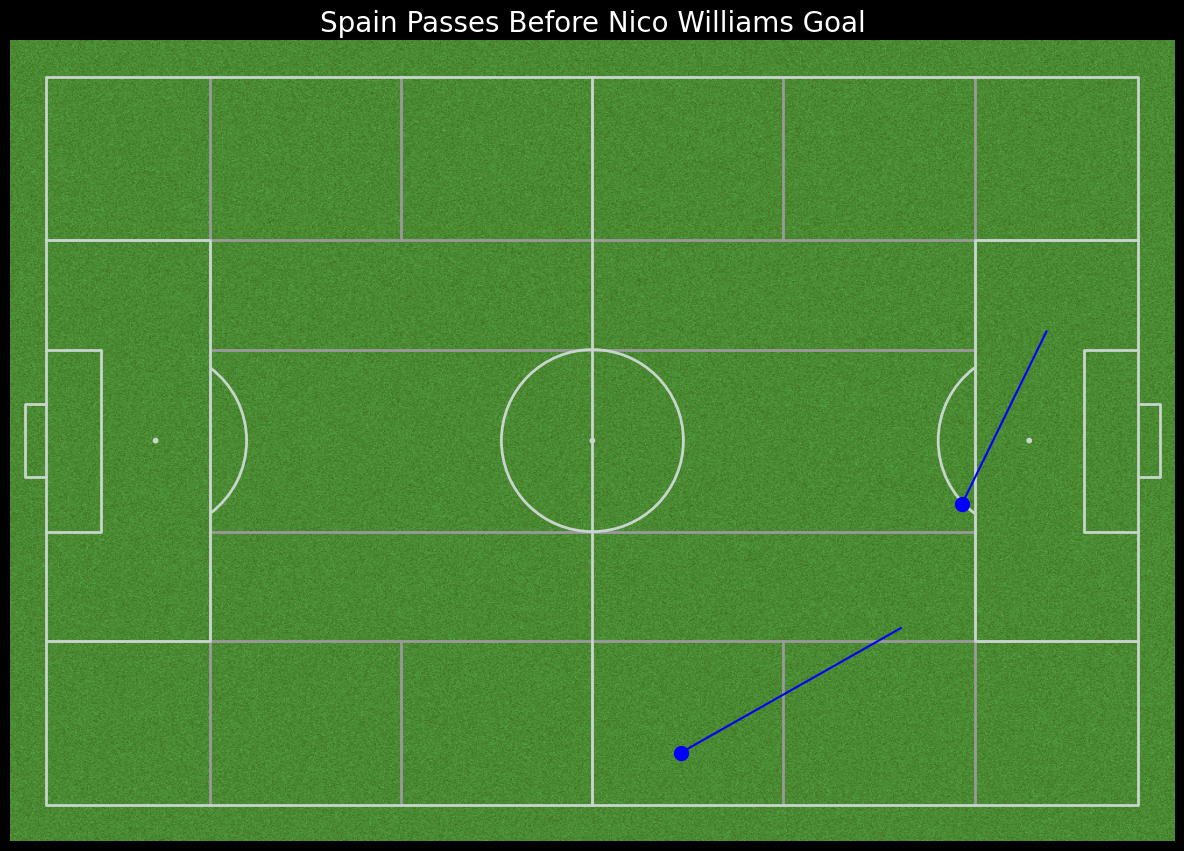

In [166]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
             pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

for x in range(len(passes_to_nico_goal_df['id'])):
    if passes_to_nico_goal_df['pass.outcome.name'].iloc[x] in incomplete_pass_outcomes:
        """
        Here we denote where passes are incomplete
        """
        plt.plot((passes_to_nico_goal_df['location'].iloc[x][0], passes_to_nico_goal_df['pass.end_location'].iloc[x][0]),
                (passes_to_nico_goal_df['location'].iloc[x][1], passes_to_nico_goal_df['pass.end_location'].iloc[x][1]), color='red')

        plt.scatter(passes_to_nico_goal_df['location'].iloc[x][0],passes_to_nico_goal_df['location'].iloc[x][1],color='red',s = 100)
    else:
        plt.plot((passes_to_nico_goal_df['location'].iloc[x][0], passes_to_nico_goal_df['pass.end_location'].iloc[x][0]),
                (passes_to_nico_goal_df['location'].iloc[x][1], passes_to_nico_goal_df['pass.end_location'].iloc[x][1]), color='blue')

        plt.scatter(passes_to_nico_goal_df['location'].iloc[x][0],passes_to_nico_goal_df['location'].iloc[x][1],color='blue',s = 100)
plt.title('Spain Passes Before Nico Williams Goal', color='white', size=20)